[-0.496748185827405, -0.4598237778379626, 0.6820403743739304]


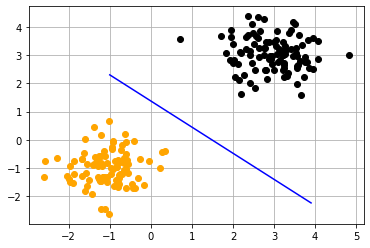

In [ ]:
import math
import random
from matplotlib import pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def gen_vec(m1, m2, d1, d2, n):
    a = []
    b = []
    for i in range(n):
        a.append([random.gauss(m1, d1), random.gauss(m1, d1)])
        b.append([random.gauss(m2, d2), random.gauss(m2, d2)])
    return a, b

def suma(x, w):
    s = 0
    for j in range(len(x)):
        s += w[j] * x[j]
    s += w[2]
    return s

def iter_f(i, t, arr, w, e0):
    s = suma(arr[i], w)
    out = 1 / (1 + math.exp(- (s)))
    e = 0.5 * (out - t)**2
    if e < e0:
        return e
    d = 0.7 * (out - t) * (math.exp(-s) / (1 + math.exp(-s)) ** 2)
    w[0] -= d * arr[i][0]
    w[1] -= d * arr[i][1]
    w[2] -= d
    return e

def main():
    n = 100
    e0 = 0.051
    arr_a, arr_b = gen_vec(3, -1, 0.6, 0.6, n)
    arr_w = [random.random(), random.random(), random.random()]
    while True:
        s = 0
        for i in range(n):
            s += iter_f(i, 0, arr_a, arr_w, e0)
            s += iter_f(i, 1, arr_b, arr_w, e0)
        s /= (n*2)
        #print(s)
        if s < e0:
            break
    koef = [- (arr_w[1] / arr_w[0]), - (arr_w[2] / arr_w[0])]
    arr1 = []
    arr2 = []
    a = -1.0

    while a <= 4.0:
        arr1.append(a)
        arr2.append(a * koef[0] + koef[1])
        a += 0.1
    ax1.clear()
    ax1.plot(arr1, arr2, color="blue")
    for i in range(n):
        ax1.plot(arr_a[i][0], arr_a[i][1], "ro", color="black")
        ax1.plot(arr_b[i][0], arr_b[i][1], "ro", color="orange")
    ax1.grid()
    print(arr_w)

def refrash():
    #ani = animation.FuncAnimation(fig, main, interval=1000)
    main()
    plt.show()

refrash()